In [1]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_paths = glob('../dataset/cifar/train/*.png')

path = data_paths[0]
path

'../dataset/cifar/train\\0_frog.png'

In [7]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

image.shape

TensorShape([32, 32, 3])

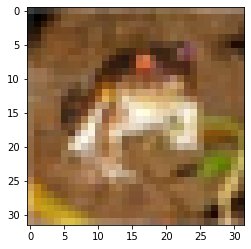

In [9]:
plt.imshow(image)
plt.show()

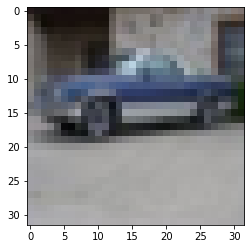

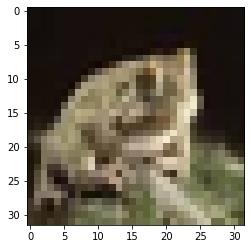

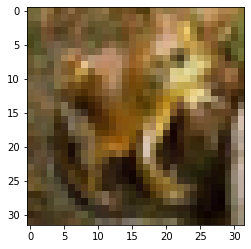

In [13]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

for _ in range(3):
    plt.imshow(read_image(data_paths[1+_]))
    plt.show()

### Batch

#### Images in List

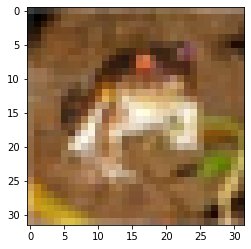

In [15]:
batch_images = []

for path in data_paths[:8]:
    image = read_image(path)
    # resize 필요
    # image = cv2.reisize(image, (32,32))
    batch_images.append(image)
    
plt.imshow(batch_images[0])
plt.show()

In [18]:
batch = tf.convert_to_tensor(batch_images)

# (batch_size, height, width, channel)
batch.shape

TensorShape([8, 32, 32, 3])

In [21]:
def make_batch(batch_paths):
    batch_images = []
    
    for path in batch_paths:
        image = read_image(path)
        batch_images.append(image)
        
    return tf.convert_to_tensor(batch_images)

make_batch(data_paths[:10]).shape

TensorShape([10, 32, 32, 3])